# <span style="color:#0b486b">SIT307 - Data Mining and Machine Learning</span>


## <span style="color:#0b486b">Machine Learning Challenge</span>

##      Rain in Autralia 
### Group 10 | Data Mining | 18/09/2019
***

# <span style="color:#a00000">Instructions for Use</span>

Please take `Results.csv` from the datasets folder and place it alongside this notebook.

`Results.csv` is generated by the previous assessment task.
Therefore, it may be regenerated using the provided notebook for the prior assessment task.


## Table of contents

1. <a href="#1.-Features Selection">Features Selection</a>
2. <a href="#2.-Machine Learning Models">Machine Learning Challenge</a>
3. <a href="#2.-Experiments">Experiments</a>

Load libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import result from Data Preparation.

In [2]:
#get data from csv file
data = pd.read_csv('Result.csv')
#look at the data size
print(f'Size of the dataset : {data.shape}')
#have a look first 5 data in dataset
data.head()

Size of the dataset : (114547, 63)


,State,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,NSW,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,...,0,0,0,0,0,0,0,1,0,0
1,NSW,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,...,1,0,0,0,0,0,0,0,0,0
2,NSW,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,...,0,0,0,0,0,0,0,1,0,0
3,NSW,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,...,0,0,0,1,0,0,0,0,0,0
4,NSW,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,...,0,0,0,0,0,0,0,0,0,0


Select the Victoria data to apply for Machine Learning models

In [3]:
VIC = data[lambda df:(df.State == 'VIC')]
VIC = VIC.drop(['State'], axis = 1)
VIC.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
38659,0.332542,0.329670,0.008705,0.351562,0.282353,0.329412,0.71,0.37,0.457851,0.4864,...,0,0,0,0,0,0,0,1,0,0
38660,0.296912,0.371429,0.001088,0.289062,0.211765,0.258824,0.66,0.47,0.476033,0.4832,...,0,0,0,0,0,0,0,0,1,0
38661,0.420428,0.356044,0.001632,0.281250,0.235294,0.211765,0.82,0.42,0.479339,0.5504,...,0,0,0,0,0,0,0,0,0,1
38662,0.353919,0.421978,0.000544,0.250000,0.082353,0.235294,0.60,0.33,0.590083,0.5680,...,0,0,0,0,0,0,0,0,0,0
38663,0.510689,0.505495,0.003264,0.421875,0.329412,0.435294,0.74,0.40,0.431405,0.4544,...,1,0,0,0,0,0,0,0,0,0


Split features and target variable

In [4]:
features = VIC.drop(['RainTomorrow'], axis = 1)
target = VIC['RainTomorrow']

## 1. Features Selection

Using SelectKBest() function to choose 10 features that have the most affect to target.

In [5]:
import functools
from sklearn.feature_selection import SelectKBest, mutual_info_classif

def is_feature_discrete(name):
    """
    Returns whether a column from the dataset is discrete.

    name: The column name.
    """
    if name == 'RainToday':
        return True
    if name.startswith('WindGustDir'):
        return True
    if name.startswith('WindDir'):
        return True
    return False

def get_discrete_mask(columns):
    """
    Returns a boolean mask for use with mutual_info_classif
    from the Victoria Rain dataset.

    name: The column names.
    """
    return [is_feature_discrete(name) for name in columns]

# Select the K-Best features.
new = SelectKBest(functools.partial(mutual_info_classif,
                                    discrete_features=get_discrete_mask(features),
                                    random_state=1234),
                  k=10)
new = SelectKBest(mutual_info_classif, k=10)
new.fit(features, target)

# Generate new feature vectors.
X = new.transform(features)
print(new.get_support(indices=True))

[ 1  2  3  6  7  8  9 11 12 48]


In [6]:
feature_index = new.get_support(indices=True)
selected_features = features.columns
selected_features = selected_features[feature_index]
selected_features

Index(['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainToday', 'WindDir9am_N'],
      dtype='object')

Get best 10 features index <br />
Create new DataFrame to store data

In [7]:
new_data = VIC[selected_features][:]
new_data['RainTomorrow'] = VIC['RainTomorrow']
new_data.head()

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp3pm,RainToday,WindDir9am_N,RainTomorrow
38659,0.329670,0.008705,0.351562,0.71,0.37,0.457851,0.4864,0.311111,1,0,0
38660,0.371429,0.001088,0.289062,0.66,0.47,0.476033,0.4832,0.353333,0,0,0
38661,0.356044,0.001632,0.281250,0.82,0.42,0.479339,0.5504,0.328889,0,0,0
38662,0.421978,0.000544,0.250000,0.60,0.33,0.590083,0.5680,0.420000,0,0,1
38663,0.505495,0.003264,0.421875,0.74,0.40,0.431405,0.4544,0.502222,1,0,0


In [8]:
Y = np.array(new_data['RainTomorrow'])

Using 10-fold cross validation to evaluate result of models <br />
Report the following scores:
> Accuracy <br />
> F-Score <br />
> Precision <br />
> Recall <br />

In [9]:
from sklearn.model_selection import KFold

In [10]:
def report(model):
    # Using 10-fold cross validation calcualte the mean report scores.
    kfold = KFold(n_splits=10, random_state=23)
    
    Accuracy = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    print("Accuracy mean : {}".format(Accuracy.mean()))
    
    F_Score = cross_val_score(model, X, Y, cv=kfold, scoring='f1_weighted')
    print("F-Score mean : {}".format(F_Score.mean()))

    Precision = cross_val_score(model, X, Y, cv=kfold, scoring='precision_macro')
    print("Precision mean : {}".format(Precision.mean()))

    Recall = cross_val_score(model, X, Y, cv=kfold, scoring='recall_macro')
    print("Recall mean : {}".format(Recall.mean()))
    
#     score = np.array([0, 0, 0, 0])
#     score[0] = Scores_kfoldt1.mean()
#     score[1] = Scores_kfold2.mean()
#     score[2] = Scores_kfold3.mean()
#     score[3] = Scores_kfold4.mean()
    
    return Accuracy.mean(), F_Score.mean(), Precision.mean(), Recall.mean()

## 2. Machine Learning Models

### 2.1 SVM classifier

In [11]:
from sklearn.pipeline import Pipeline
svm_pipeline = Pipeline(steps=[('svm', SVC(kernel='rbf', gamma = 'auto'))])

**Results**

In [12]:
accuracy, f_score, precision, recall = report(svm_pipeline)
SVM_Score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy mean : 0.8395029143297041
F-Score mean : 0.823687828306787
Precision mean : 0.8075095765795568
Recall mean : 0.7015716453348385


### 2.2 Decision Tree classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
treeclf = DecisionTreeClassifier(random_state=1)
parameterstree = {'max_depth':range(1,15)}
clftree = GridSearchCV(treeclf, parameterstree, cv=10,scoring = 'accuracy')

# Fit our training data
clftree.fit(X, Y)
clftree.best_params_

{'max_depth': 6}

In [15]:
DT = DecisionTreeClassifier(max_depth=6, random_state=1)

**Results**

In [16]:
accuracy, f_score, precision, recall = report(DT)
DT_Score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy mean : 0.8356921129164551
F-Score mean : 0.8248501950189919
Precision mean : 0.7822225299131935
Recall mean : 0.7136561997395311


### 2.3 kNN classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
parametersknn = {'n_neighbors': range(3,10),'weights':('uniform','distance')}
knnclf = KNeighborsClassifier()
clfknn = GridSearchCV(knnclf, parametersknn, cv = 10, scoring = 'accuracy')
clfknn.fit(X,Y)
clfknn.best_params_


{'n_neighbors': 9, 'weights': 'distance'}

In [18]:
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'distance')

**Results**

In [19]:
accuracy, f_score, precision, recall = report(knn)
KNN_Score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy mean : 0.8337671405657561
F-Score mean : 0.8252367646826662
Precision mean : 0.7763593423603801
Recall mean : 0.7218927324052286


### 2.4 Logistic Regression classifier

In [20]:
from sklearn.linear_model import LogisticRegression

parameterslrc = {'C' : (1e2, 1e5,1e20),
                'solver': ('newton-cg','lbfgs', 'liblinear', 'sag', 'saga')}
knnlrc = LogisticRegression(max_iter=1000)
clflrc = GridSearchCV(knnlrc,parameterslrc,cv = 10,scoring = 'accuracy')
clflrc.fit(X,Y)
clflrc.best_params_

{'C': 100000.0, 'solver': 'sag'}

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1e2, solver = 'liblinear', max_iter=1000)

**Results**

In [22]:
accuracy, f_score, precision, recall = report(LR)
LR_Score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy mean : 0.8418513041191901
F-Score mean : 0.8324593479021424
Precision mean : 0.7938255861798156
Recall mean : 0.7285917577672909


### 2.5 Neural Network Classifier

In [23]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), alpha = 0.01, momentum = 0.1, max_iter = 1000)

**Results**

In [24]:
accuracy, f_score, precision, recall = report(mlp)
NN_Score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy mean : 0.8435071052256363
F-Score mean : 0.834193117374558
Precision mean : 0.793550363534046
Recall mean : 0.7322783076580841


## 3. Experiments

**Create a DataFrame of score mean.**

In [25]:
score = pd.DataFrame([SVM_Score, DT_Score, KNN_Score, LR_Score, NN_Score], columns=('Accuracy', 'F-Score', 'Precision', 'Recall'))
score = score.rename(index={0: 'SVM', 1: 'Decision Tree', 2: 'k-NN', 3: 'Logistic Regression', 4: 'Neural Network'})

**Sort the result by descending accuracy**

In [26]:
score = score.sort_values(['Accuracy'], ascending=[False])

**Sketch a line graph to compare result of 5 models**

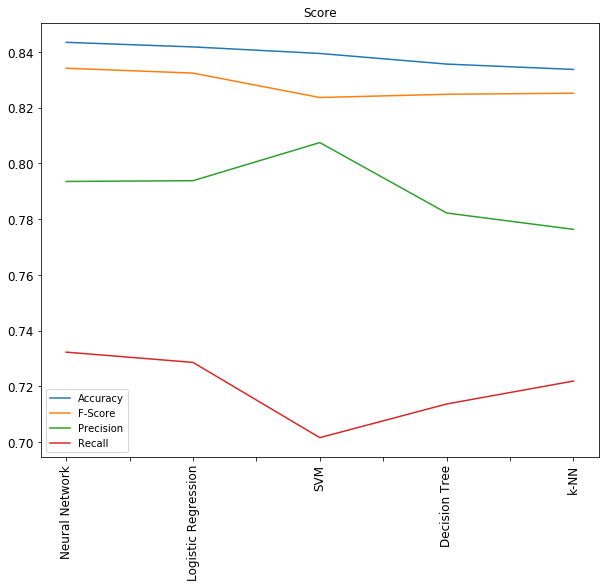

In [27]:
score.plot(rot=90, figsize = (10, 8), title = 'Score', fontsize = 12)

## 3.1 Cohen's Kappa Score

The following cell calculates the values Cohen's Kappa Score using 10-fold cross validation.

New classifiers have been initialized with the same parameters as the classifiers used within the previous sections and
the Kappa score is calculated for all pairs.

In [28]:
from sklearn.base import clone
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# A tuple of classifier (name, classifier) tuples.
# This tuple uses the parameters as found prior, using SelectKBest.
example_classifiers = (('dt', DecisionTreeClassifier(max_depth=6, random_state=1)),
                       ('lreg', LogisticRegression(C=1e2, solver = 'liblinear', max_iter=1000)),
                       ('knn', KNeighborsClassifier(n_neighbors = 8, weights = 'distance')),
                       ('svm', SVC(kernel='rbf', gamma = 'auto')),
                       ('mlpnn', MLPClassifier(hidden_layer_sizes=(30,30,30), alpha = 0.01, momentum = 0.1, max_iter = 1000)))

def kappa_kfold_report(features, classes, model_1, model_2):
    """
    Generates a 10-fold cross validation report for Cohen's Kappa.
    This is a measure of inter-rater reliability
    i.e. How the classifier's results correlate.
    
    features: Rows of features to classify.
    classes: The true class of the rows.
    model_1: The first model to compare.
    model_2: The second model to compare.
    return: Cohen's Kappa score for each train-test split.
    """
    results = []
    ten_fold = KFold(n_splits=10)

    for test, train in ten_fold.split(features, classes):
        # Each of these classifiers is cloned each iteration to ensure
        # that any state mutations are confined to the iteration they
        # were first run within.
        model_1_clone = clone(model_1)
        model_2_clone = clone(model_2)
        model_1_clone.fit(features[train], classes[train])
        model_1_result = model_1_clone.predict(features[test])
        model_2_clone.fit(features[train], classes[train])
        model_2_result = model_2_clone.predict(features[test])
        results.append(cohen_kappa_score(model_1_result, model_2_result))
    
    return results

def print_kappa_kfold_report(features, classes, model_1, model_2):
    """
    Prints a report describing the values of a 10-fold cross validation
    for Cohen's Kappa score and their mean value.
    
    features: Rows of features to classify.
    classes: The true class of the rows.
    model_1: The first model to compare.
    model_2: The second model to compare.
    """
    print(f'Comparing {model_1[0]} and {model_2[0]}')
    model_1 = model_1[1]
    model_2 = model_2[1]
    results = kappa_kfold_report(features, classes, model_1, model_2)
    print(results)
    print(f'Mean Cohen\'s kappa score: {np.mean(results)}\n')

# Generate the unique classifier pairs and print the Kappa values for 10-fold cross validation
# also print the mean Kappa value.
for i in range(len(example_classifiers)):
    for j in range(i+1, len(example_classifiers)):
        print_kappa_kfold_report(X, Y, example_classifiers[i], example_classifiers[j])

Comparing dt and lreg
[0.6278184496075647, 0.6204528636431015, 0.6471986812717019, 0.6927401529298614, 0.6402932502895873, 0.5291301251677909, 0.5567755078446366, 0.6788702150471252, 0.6605160697320439, 0.7154255603129442]
Mean Cohen's kappa score: 0.6369220875846358

Comparing dt and knn
[0.5444329671217776, 0.5624455916003155, 0.6481681562212959, 0.6616875745845965, 0.6241983447891937, 0.5191600978783736, 0.5830835235205636, 0.6136713807951817, 0.6014802327035882, 0.6436447719195695]
Mean Cohen's kappa score: 0.6001972641134455

Comparing dt and svm
[0.6152975847213991, 0.6063314634083194, 0.5743722509157481, 0.6673310122773809, 0.5589449853707158, 0.21355503486454686, 0.520458212053304, 0.6528885127611243, 0.5924541730902455, 0.686954209783029]
Mean Cohen's kappa score: 0.5688587439245814

Comparing dt and mlpnn
[0.6168368322811983, 0.6051355270111934, 0.7005612520849274, 0.6955371984444773, 0.6793732141744402, 0.510275366847308, 0.5729813767228757, 0.6707396042223092, 0.67114254184

## 3.2 Ensemble Methods (Voting Classifier)

Upon reviewing the values for Cohen's Kappa score we can see quite high inter-rater
agreement which is further demonstrated by the fact that these VotingClassifiers
do not appear to significantly boost the classification's accuracy.

First we take the three simplest algorithms and attempt to achieve a consensus, voting
using the highest predicted class probabilities (`voting='soft'`).

The `voting='soft'` parameter is recommended within the scikit-learn documentation
for well-calibrated classifiers such as those which were trained within the previous sections.
Therefore, soft-probabilistic voting was chosen for this classifier.

This classifier runs quite quickly on the dataset.


In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# A voting classifier using the argmax of predicted class probabilities (voting='soft').
# This is recommended within the sklearn VotingClassifier documentation,
# for well-calibrated classifiers, such as these.
votingclassif = VotingClassifier((('dt', DecisionTreeClassifier(max_depth=6, random_state=1)),
                                  ('lreg', LogisticRegression(C=1e2, solver = 'liblinear', max_iter=1000)),
                                  ('knn', KNeighborsClassifier(n_neighbors = 9, weights = 'distance'))),
                                  voting='soft')

accuracy, f_score, precision, recall = report(votingclassif)
VOTING_score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy mean : 0.8443538659962655
F-Score mean : 0.8337460869132999
Precision mean : 0.8014438691263148
Recall mean : 0.7257854439716571


Additionally, we may take all five classifiers and combine these into a single VotingClassifier.
This does not significantly improve the accuracy (these classifiers still have not achieved 85% accuracy or higher).

Please note that this ensemble classifier is extremely slow to run (it may take multiple hours on some machines).

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# A voting classifier using the argmax of predicted class probabilities (voting='soft').
# This is recommended within the sklearn VotingClassifier documentation,
# for well-calibrated classifiers, such as these.
votingclassif5 = VotingClassifier((('dt', DecisionTreeClassifier(max_depth=6, random_state=1)),
                       ('lreg', LogisticRegression(C=1e2, solver = 'liblinear', max_iter=1000)),
                       ('knn', KNeighborsClassifier(n_neighbors = 8, weights = 'distance')),
                       ('svm', SVC(kernel='rbf', gamma = 'auto', probability = True)),
                       ('mlpnn', MLPClassifier(hidden_layer_sizes=(30,30,30), alpha = 0.01, momentum = 0.1, max_iter = 1000))),
                                  voting='soft')

accuracy, f_score, precision, recall = report(votingclassif5)
FIVEVOTING_score = np.array([accuracy, f_score, precision, recall])

C:\Users\khanh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KeyboardInterrupt: 